<a href="https://colab.research.google.com/github/tanisha0303/Deep-Learning-Projects/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras import layers
import keras

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:
import os, re, random
import pandas as pd
import numpy as np
import zipfile
np.random.seed(2)

In [ ]:
#Machine learning
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model

In [ ]:
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
PATH="/drive/My Drive/Colab Notebooks/archive/training_set/training_set/dogs_cats"

In [ ]:
PATH_TRAIN= "/drive/My drive/Colab Notebook/archive/training_set/training_set/dogs"
PATH_TEST="C:/Users/hp/Downloads/archive/test_set/test_set"

In [ ]:
train_images = os.listdir(PATH)

In [ ]:
imagenames = np.array([f'{f}' for f in train_images])

In [ ]:

imagenames

array(['dog.3698.jpg', 'dog.368.jpg', 'dog.3703.jpg', ..., 'cat.1002.jpg',
       'cat.1025.jpg', 'cat.1031.jpg'], dtype='<U18')

In [ ]:
categories = []
for imagename in imagenames:
    # Loop through data and split our images names
    split_category = imagename.split('.')[0]
    # Assign labels
    if split_category == 'cat':
        categories.append(str(0))
    else:
        categories.append(str(1))

In [ ]:
animals = pd.DataFrame({
    'Image name': imagenames,
    'Category': categories
})
animals.head(5)

,Image name,Category
0,dog.3698.jpg,1
1,dog.368.jpg,1
2,dog.3703.jpg,1
3,dog.3715.jpg,1
4,dog.3710.jpg,1


In [ ]:
animals['Category'].value_counts()

0    4020
1    4016
Name: Category, dtype: int64

In [ ]:
X_train, X_val = train_test_split(animals, test_size=0.2,  random_state=2)
X_train = X_train.reset_index()
X_val = X_val.reset_index()

In [ ]:
X_train

,index,Image name,Category
0,2082,dog.1960.jpg,1
1,3952,dog.1853.jpg,1
2,3821,dog.1724.jpg,1
3,4302,cat.412.jpg,0
4,1894,dog.3600.jpg,1
...,...,...,...
6423,3606,dog.1546.jpg,1
6424,5704,cat.3427.jpg,0
6425,6637,cat.2521.jpg,0
6426,2575,dog.2405.jpg,1


In [ ]:
X_val

,index,Image name,Category
0,379,dog.439.jpg,1
1,4430,cat.506.jpg,0
2,7699,cat.1666.jpg,0
3,5990,cat.3721.jpg,0
4,1421,dog.3192.jpg,1
...,...,...,...
1603,3094,dog.1102.jpg,1
1604,3791,dog.1725.jpg,1
1605,861,dog.875.jpg,1
1606,5953,cat.3665.jpg,0


In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

In [ ]:
total_X_train = X_train.shape[0]
total_X_val = X_val.shape[0]

In [ ]:
total_X_train

6428

In [ ]:
total_X_val

1608

VGG 16

In [ ]:
epochs = 5
batch_size = 16

In [ ]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
print(pre_trained_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

In [ ]:
last_layer=pre_trained_model.get_layer('block5_pool')
last_output=last_layer.output

In [ ]:
x = GlobalMaxPooling2D()(last_output)

In [ ]:
x = Dense(512, activation='relu')(x)

In [ ]:
x = Dropout(0.5)(x)

In [ ]:
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model_mod = Model(pre_trained_model.input, x)


In [ ]:
model_mod.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
                  metrics=['accuracy']
                 )

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    X_train,
    '/drive/My Drive/Colab Notebooks/archive/training_set/training_set/dogs_cats',
    x_col='Image name',
    y_col='Category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    #validate_filenames = False
)

Found 6427 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Image name". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    X_val,
    "/drive/My Drive/Colab Notebooks/archive/training_set/training_set/dogs_cats",
    x_col='Image name',
    y_col='Category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    #validate_filenames = False
)

Found 1608 validated image filenames belonging to 2 classes.


In [ ]:
generated_example_df = X_train.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    generated_example_df,
    "/drive/My Drive/Colab Notebooks/archive/training_set/training_set/dogs_cats",
    x_col='Image name',
    y_col='Category',
    class_mode='categorical',
    #validate_filenames = False
)

Found 1 validated image filenames belonging to 1 classes.


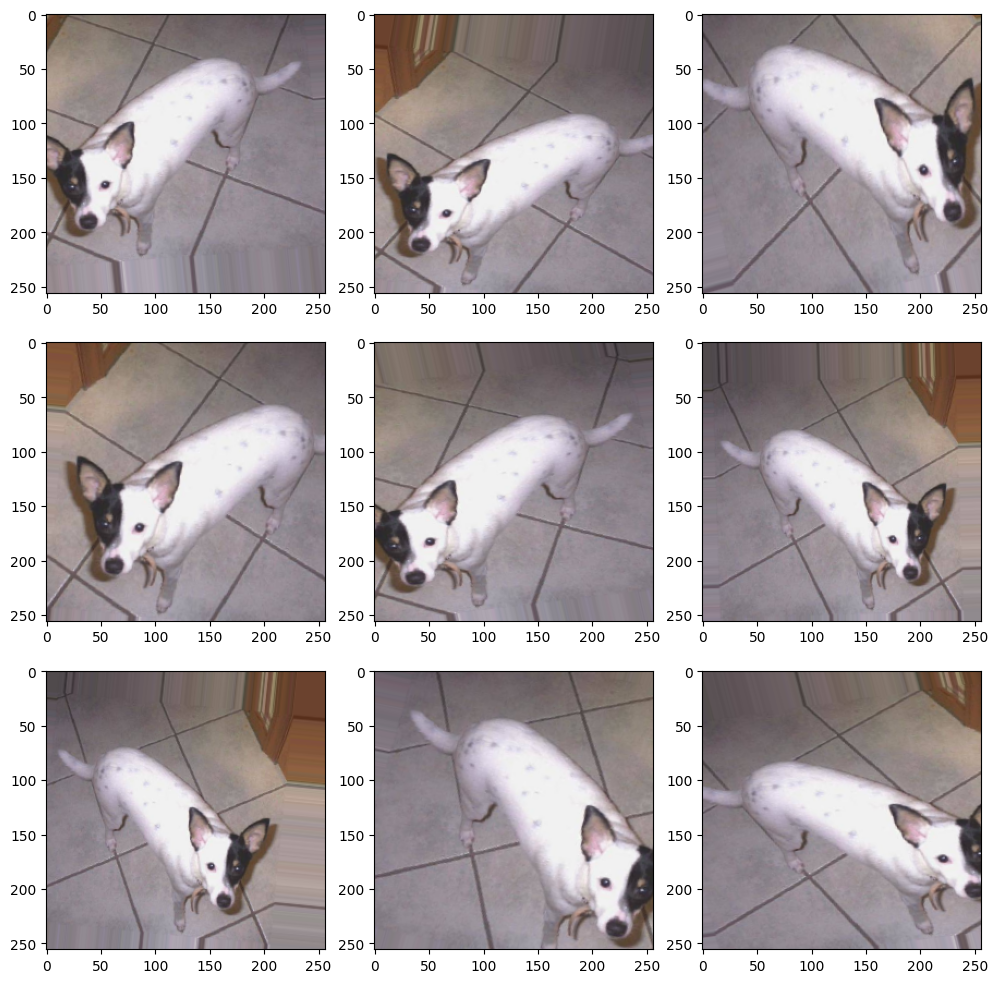

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
earlystop = EarlyStopping(patience=10,
                          verbose=1,
                          mode='auto'
                         )

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001
                                           )

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
callbacks

In [ ]:
history = model_mod.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_X_val//batch_size,
    steps_per_epoch=total_X_train//batch_size,
    callbacks=callbacks
)

Epoch 1/5
401/401 [==============================] - 229s 540ms/step - loss: 0.5090 - accuracy: 0.7403 - val_loss: 0.2470 - val_accuracy: 0.8963 - lr: 1.0000e-04
Epoch 2/5
401/401 [==============================] - 86s 214ms/step - loss: 0.2526 - accuracy: 0.8933 - val_loss: 0.1598 - val_accuracy: 0.9413 - lr: 1.0000e-04
Epoch 3/5
401/401 [==============================] - 86s 215ms/step - loss: 0.1959 - accuracy: 0.9184 - val_loss: 0.1407 - val_accuracy: 0.9531 - lr: 1.0000e-04
Epoch 4/5
401/401 [==============================] - 87s 216ms/step - loss: 0.1677 - accuracy: 0.9329 - val_loss: 0.1401 - val_accuracy: 0.9438 - lr: 1.0000e-04
Epoch 5/5
401/401 [==============================] - 86s 213ms/step - loss: 0.1532 - accuracy: 0.9368 - val_loss: 0.1199 - val_accuracy: 0.9563 - lr: 1.0000e-04


In [ ]:
model_mod.save_weights('model_wieghts.h5')
model_mod.save('model_keras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


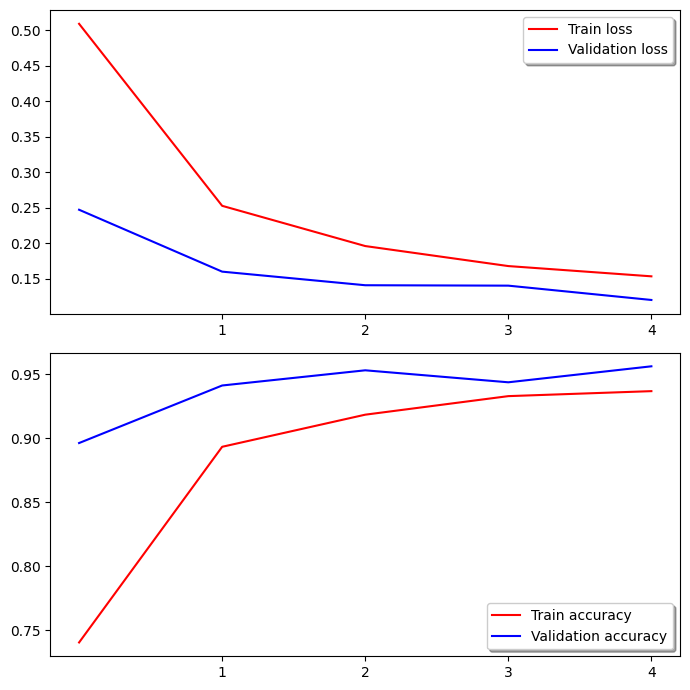

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))

ax1.plot(history.history['loss'], color='r', label="Train loss")
ax1.plot(history.history['val_loss'], color='b', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
legend = ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='r', label="Train accuracy")
ax2.plot(history.history['val_accuracy'], color='b',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
legend = ax2.legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

In [ ]:
Y_val = X_val['Category']
# Predict on validation data
Y_pred =  model_mod.predict_generator(validation_generator)

<ipython-input-46-a5ff9a982a96>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred =  model_mod.predict_generator(validation_generator)


In [ ]:
# Define treshold
threshold = 0.5
# Convert
Y_pred_conv = np.where(Y_pred > threshold, 1,0)

In [ ]:
Y_pred_conv[:,0]

array([1, 1, 1, ..., 1, 1, 1])

<Axes: >

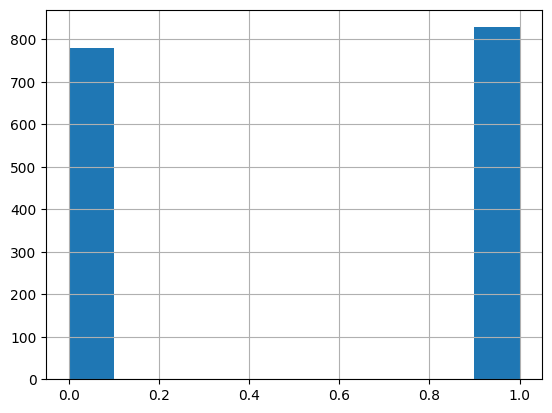

In [ ]:
pd.Series(Y_pred_conv[:,0]).hist()

In [ ]:
Y_val.dtype

dtype('O')

In [ ]:
Y_val_str = Y_val.astype(int)

In [ ]:
Y_val_str

0       1
1       0
2       0
3       0
4       1
       ..
1603    1
1604    1
1605    1
1606    0
1607    1
Name: Category, Length: 1608, dtype: int64

In [ ]:
Y_pred_conv

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

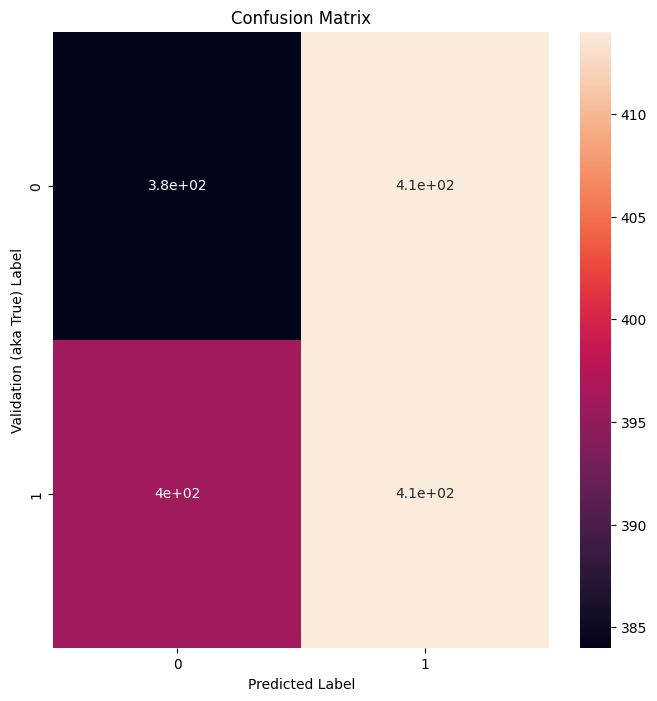

array([[384, 414],
       [396, 414]])

In [ ]:
import seaborn as sns
confusion_mtx = confusion_matrix(Y_val_str, Y_pred_conv)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Validation (aka True) Label")
plt.title("Confusion Matrix")
plt.show()
confusion_mtx


In [ ]:
test_images = os.listdir('/drive/My Drive/Colab Notebooks/archive/test_set/test_set/dogs_cats')
X_test = pd.DataFrame({
    'test_imagename': test_images
})
samples = X_test.shape[0]
samples

2043

In [ ]:
X_test

,test_imagename
0,dog.4014.jpg
1,dog.4030.jpg
2,cat.4991.jpg
3,cat.4999.jpg
4,dog.4007.jpg
...,...
2038,cat.4037.jpg
2039,cat.4055.jpg
2040,cat.4040.jpg
2041,cat.4029.jpg


In [ ]:
categoriess = []
for imagename in X_test['test_imagename']:
    # Loop through data and split our images names
    split_category = imagename.split('.')[0]
    # Assign labels
    if split_category == 'cat':
        categoriess.append(str(0))
    else:
        categoriess.append(str(1))


In [ ]:
 animalsee = pd.DataFrame({
    'Image name': test_images,
    'Category': categoriess
})
animalsee.head(5)

,Image name,Category
0,dog.4014.jpg,1
1,dog.4030.jpg,1
2,cat.4991.jpg,0
3,cat.4999.jpg,0
4,dog.4007.jpg,1


In [ ]:
X_test.count()

test_imagename    2043
dtype: int64

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    X_test,
    "/drive/My Drive/Colab Notebooks/archive/test_set/test_set/dogs_cats",
    x_col='test_imagename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 2043 validated image filenames.


In [ ]:
test_generator

In [ ]:
animalsee['Category'].count()

2043

Prediction on test data

In [ ]:
predict = model_mod.predict_generator(test_generator, steps=np.ceil(samples/batch_size))

<ipython-input-83-01502e437f0c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model_mod.predict_generator(test_generator, steps=np.ceil(samples/batch_size))


In [ ]:
predict

array([[9.6795303e-01],
       [9.9991524e-01],
       [2.6441074e-04],
       ...,
       [1.6972280e-04],
       [4.5232471e-02],
       [2.9429853e-01]], dtype=float32)

In [ ]:
threshold = 0.5
prediction = np.where(predict > threshold, 1,0)

In [ ]:
prediction

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
prediction.astype(int)

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
animalsee.astype(int)

ValueError: invalid literal for int() with base 10: 'dog.4014.jpg'

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
df = pd.DataFrame(prediction,columns=['Category'])

In [ ]:
df_a

,Category
0,1
1,1
2,0
3,0
4,1
...,...
2038,0
2039,0
2040,0
2041,0


In [ ]:
import pandas as pd
df_a = pd.DataFrame(animalsee,columns=['Category'])

In [ ]:
df_a['Category']

0       1
1       1
2       0
3       0
4       1
       ..
2038    0
2039    0
2040    0
2041    0
2042    0
Name: Category, Length: 2043, dtype: object

In [ ]:
df['Category']

0       1
1       1
2       0
3       0
4       1
       ..
2038    0
2039    0
2040    0
2041    0
2042    0
Name: Category, Length: 2043, dtype: int64

In [ ]:
das=df_a['Category'].astype(str).astype(int)


In [ ]:
das

0       1
1       1
2       0
3       0
4       1
       ..
2038    0
2039    0
2040    0
2041    0
2042    0
Name: Category, Length: 2043, dtype: int64

In [ ]:
confusion_matrix(das,df['Category'])

array([[970,  51],
       [ 42, 980]])